<a href="https://colab.research.google.com/github/Trantracy/San_Francisco_Salaries/blob/master/Data_Manipulation_and_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/0AUxkXt.png)

## Example - San Francisco city employee salary data

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.


### Step 1 - Exploration Ideas

1. How have salaries changed over time between different groups of people?
2. How are base pay, overtime pay, and benefits allocated between different groups?
4. How is budget allocated based on different groups and responsibilities?

### Step 2 - Checking the data

**Import tools set**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Fill the blanks
sal = pd.read_csv('/content/gdrive/My Drive/Student Files/FTMLE - Tonga/Data/salaries.csv')

### Overview

In [0]:
# Show a summary of the data
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [0]:
# Show some 10 random rows
sal.sample(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
127833,127834,Letha Jones,Transit Operator,61358.41,9102.24,3713.23,32819.76,74173.88,106993.64,2014,NaN,San Francisco,NaN
74182,74183,Connie J Brandon,Attorney (Civil/Criminal),179925.40,0.00,1250.00,49382.63,181175.40,230558.03,2013,NaN,San Francisco,NaN
128167,128168,Daniel A Villcas,HSA Sr Eligibility Worker,74259.33,321.98,1180.00,30285.38,75761.31,106046.69,2014,NaN,San Francisco,NaN
114149,114150,Elayne Hada-Souza,Registered Nurse,133150.01,0.00,8914.57,46991.62,142064.58,189056.20,2014,NaN,San Francisco,NaN
51416,51417,Tanita Dawson,Senior Administrative Analyst,78374.80,0.00,0.00,34347.20,78374.80,112722.00,2012,NaN,San Francisco,NaN
106042,106043,Jomarsan Cenit,Museum Guard,9818.95,0.00,0.00,0.00,9818.95,9818.95,2013,NaN,San Francisco,NaN
108051,108052,Chad E Barr,Public Svc Aide-Public Works,4536.94,0.00,100.82,46.38,4637.76,4684.14,2013,NaN,San Francisco,NaN
90729,90730,Winifreda Panopio,Principal Account Clerk,73899.01,2387.39,648.00,28462.26,76934.40,105396.66,2013,NaN,San Francisco,NaN
101018,101019,Tran T Phung,Public Svc Aide-Public Works,29132.53,0.00,0.00,20578.37,29132.53,49710.90,2013,NaN,San Francisco,NaN
114580,114581,Zexu Fang,Registered Nurse,127085.80,5362.69,11179.95,40610.27,143628.44,184238.71,2014,NaN,San Francisco,NaN


### Step 3 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check duplication in columns in which the data must be unique**

In [0]:
# Id must be unique
# So the number of unique values must be equal the number of rows
sal['Id'].nunique() == sal.shape[0]

True

**Change the type to category**

In [0]:
# Change Year to be a categorical variable too
sal['Year'] = sal['Year'].astype('category')

**Drop unnecessary columns**

In [0]:
# Look at the info() again, which columns you can drop immediately?
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null category
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: category(1), float64(8), int64(1), object(3)
memory usage: 13.8+ MB


In [0]:
sal.drop(columns=['Notes','Status'], inplace = True)

In [0]:
# Are there any other columns that don't bring us much information?
sal['Agency'].nunique()

1

In [0]:
sal.drop(columns=['Id','Agency'], inplace = True)

In [0]:
# Check again with info()
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 9 columns):
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null category
dtypes: category(1), float64(6), object(2)
memory usage: 9.2+ MB


**Check for NaN values**

In [0]:
# Check missing values
sal.isnull().sum()

EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

**Examine few examples of NaN values**

In [0]:
# List all NaN values of OtherPay
sal[sal['OtherPay'].isnull()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
148646,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014
148650,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014
148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014
148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014


**Drop missing values of OtherPay and OvertimePay**

In [0]:
# Drop missing values
sal.drop(labels = sal[sal['OtherPay'].isnull()].index, axis = 0, inplace = True)

# Other way,
# sal[sal['OtherPay'].isnull()].dropna(inplace = True)

**Analize missing values of BasePay and Benefits**

In [0]:
# Select 10 sample of data that BasePay is null
sal[sal['BasePay'].isnull()].sample(10)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
106874,Villy Wang,"Commissioner 16.700c, No Pay",NaN,0.0,0.00,7959.18,0.00,7959.18,2013
103852,Robert Giannini,Painter,NaN,0.0,12933.00,8129.63,12933.00,21062.63,2013
107888,Summer K Graham,Management Assistant,NaN,0.0,5101.31,0.00,5101.31,5101.31,2013
106784,Lauren C Slingsby,Asst Engr,NaN,0.0,0.00,7959.18,0.00,7959.18,2013
109458,Emperatris Vega-Huerta,Senior Clerk,NaN,0.0,1674.03,0.00,1674.03,1674.03,2013
90786,Michael C Hill,Deputy Sheriff,NaN,0.0,81299.02,23877.53,81299.02,105176.55,2013
106869,Scott C Golde,Recreation Director,NaN,0.0,0.00,7959.18,0.00,7959.18,2013
106922,William Ortiz-Cartagena,"Commissioner 16.700c, No Pay",NaN,0.0,0.00,7959.18,0.00,7959.18,2013
107582,Marc Trotz,Manager IV,NaN,0.0,5958.98,0.00,5958.98,5958.98,2013
106768,Piedad D Morales,"Station Agent, Muni Railway",NaN,0.0,0.00,7959.18,0.00,7959.18,2013


In [0]:
sal[sal['Benefits'].isnull()].sample(10)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
4889,LESLIE SMITH,POLICE OFFICER III,112421.42,10626.88,1848.13,NaN,124896.43,124896.43,2011
7079,RODRIGO PARAS,"SENIOR STATIONARY ENGINEER, SEWAGE PLANT",89990.30,14237.12,8814.78,NaN,113042.20,113042.20,2011
26445,SHU JUAN MA,LIBRARY ASSISTANT,41192.32,0.00,744.33,NaN,41936.65,41936.65,2011
32082,HUONG NGUYEN,SPECIAL NURSE,8166.80,137.39,328.20,NaN,8632.39,8632.39,2011
35770,RUI YING ZHANG,CUSTODIAN,476.40,0.00,0.00,NaN,476.40,476.40,2011
27870,SIU FAASISILA,PERMIT AND CITATION CLERK,31228.73,28.11,0.00,NaN,31256.84,31256.84,2011
24637,KALSANG DOLMA,MENTAL HEALTH REHABILITATION WORKER,41577.15,5127.96,3520.51,NaN,50225.62,50225.62,2011
22984,LOI LY,PAYROLL CLERK,52430.63,1885.54,320.00,NaN,54636.17,54636.17,2011
786,GREGORY BARGE,ATTORNEY (CIVIL/CRIMINAL),176856.18,0.00,0.00,NaN,176856.18,176856.18,2011
7614,DIANA HAMPTON,REGISTERED NURSE,97281.42,3998.51,8419.99,NaN,109699.92,109699.92,2011


**For BasePay and Benefits, it is clear that NaN values are zeroes (from TotalPay and TotalPayBenefits).**

**So, simply fill NaN values with 0**

In [0]:
# Fill NaN values with 0
sal['BasePay'].fillna(0, inplace = True)

In [0]:
sal['Benefits'].fillna(0, inplace = True)

In [0]:
# Let check for NaN values again
# Your code here
sal.isnull().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

In [0]:
sal.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000
mean,66055.506718,5066.059886,3648.767297,18924.742068,74770.333901,93695.075969
std,42885.919334,11454.380559,8056.601866,17165.229731,50516.196009,62792.497391
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000
25%,32798.550000,0.000000,0.000000,0.000000,36169.955000,44073.337500
50%,64862.310000,0.000000,811.270000,23217.135000,71427.240000,92406.020000
75%,94609.715000,4658.175000,4236.065000,33468.980000,105842.960000,132877.992500
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000


**Min values of some payments are negative. Let's check it out**

In [0]:
# Select data that has negative TotalPay or TotalPayBenefits
sal[sal['TotalPayBenefits'] < 0]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
110528,Timothy E Gibson,Police Officer 3,0.0,0.0,0.00,-2.73,0.00,-2.73,2013
110529,Mark E Laherty,Police Officer 3,0.0,0.0,0.00,-8.20,0.00,-8.20,2013
110530,David P Kucia,Police Officer 3,0.0,0.0,0.00,-33.89,0.00,-33.89,2013
148653,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.00,-618.13,-618.13,2014


**There are only 4 of them, we can safely drop these data**

In [0]:
# Drop errors
sal.drop(labels = sal[sal['TotalPayBenefits'] < 0].index, axis = 0, inplace = True)

**Identify any errors or miscoding of variables**

In [0]:
# Check the unique values of Year
sal['Year'].unique()

[2011, 2012, 2013, 2014]
Categories (4, int64): [2011, 2012, 2013, 2014]

In [0]:
# Apply strip() on EmployeeName and Jobtitle 
# to remove all the leading and trailing spaces
sal['EmployeeName'] = sal['EmployeeName'].str.strip()
sal['JobTitle'] = sal['JobTitle'].str.strip()

In [0]:
# Check the number of unique value of EmployeeName
sal['EmployeeName'].nunique()

110806

In [0]:
# Check the number of unique value of EmployeeName in lower case
sal['EmployeeName'].str.lower().nunique()

80455

In [0]:
# Do the same with JobTitle

In [0]:
# Select the most common name
sal['EmployeeName'].value_counts()

Kevin Lee               13
William Wong            11
Richard Lee             11
Steven Lee              11
Michael Wong             9
                        ..
KITTY HUYNH              1
David Sands              1
Baoling  Zheng           1
JEANIE S WONG-SINGCA     1
WHITNEY SMITH            1
Name: EmployeeName, Length: 110806, dtype: int64

In [0]:
sal['EmployeeName'].str.lower().value_counts()

kevin lee              22
richard lee            19
william wong           18
steven lee             18
david wong             16
                       ..
ramonik johal           1
anamaria m birdsong     1
james t ramsey          1
christine  liu          1
wesley chow             1
Name: EmployeeName, Length: 80455, dtype: int64

*The names are duplicated because the data describes one person in different years or just because there are people who have same name. It's ok so we only need to uppercase all of the name to eliminate case sensitive.*

*But there are definitely some duplication of Job Title, example `Police Officer 3` and `POLICE OFFICER III`*

In [0]:
# Replace Name and Job Title with its uppercase
sal['JobTitle'].str.lower().unique()

array(['general manager-metropolitan transit authority',
       'captain iii (police department)',
       'wire rope cable maintenance mechanic', ...,
       'sr cnselor, juv hall (sfers)', 'forensic toxicologist supervis',
       'conversion'], dtype=object)

In [0]:
# Write a regular expression to select JobTitle that ends with a digit
sal[sal['JobTitle'].str.contains('\d$', regex = True)]['JobTitle'].unique()

array(['Captain 3', 'Assistant Deputy Chief 2', 'Transit Manager 2',
       'Deputy Chief 3', 'Lieutenant 3', 'Commander 3', 'Inspector 3',
       'Police Officer 3', 'Special Assistant 22', 'Sergeant 3',
       'Assistant Chief Attorney 2', 'Police Officer 2',
       'Assistant Chief Attorney 1', 'Project Manager 4', 'Sergeant 2',
       'Electrical Trnst Shop Sprv 1', 'Fire Safety Inspector 2',
       'Transmission Line Supervisor 1', 'Automotive Mechanic Sprv 1',
       'Assistant Inspector 3', 'Project Manager 3',
       'Special Assistant 21', 'Architectural Associate 1',
       'Landscape Architect Assoc 2', 'Utility Plumber Supervisor 2',
       'Assistant Inspector 2', 'Communications Line Wrk Sprv 2',
       'Utility Plumber Supervisor 1', 'Lieutenant 2',
       'Transit Power Line Sprv1', 'Automotive Trnst Shop Sprv 1',
       'Trnst Power Line Wrk Sprv 2', 'Electrical Trnst Mech Sprv 1',
       'Project Manager 2', 'Inspector 2', 'Special Assistant 19',
       'Electrician S

In [0]:
# Write a regex that count all type of POLICE OFFICER
sal[sal['JobTitle'].str.lower().str.contains('police officer', regex = True)]['JobTitle'].unique()

array(['POLICE OFFICER III', 'POLICE OFFICER I', 'POLICE OFFICER II',
       'INSTITUTIONAL POLICE OFFICER', 'Police Officer 3',
       'Police Officer 2', 'Police Officer',
       'Institutional Police Officer'], dtype=object)

In [0]:
#@title Default title text
# This is a simple function to transform roman number
def transform_roman(s):
    d = {'I':1, 'II':2, 'III':3, 'IV':4, 'V':5, 'VI':6, 'VII':7, 'VIII':8, 'IX':9, 'X':10, 
        'XI':11, 'XII':12, 'XIII':13, 'XIV':14, 'XV':15, 'XVI':16, 'XVII':17, 'XVIII':18, 'XIX':19, 'XX':20}
    
    s_split = s.split()
    if s_split[-1] in d.keys():
        s_split[-1] = str(d[s_split[-1]])
    return ' '.join(s_split)

# Test it out
transform_roman('POLICE OFFICER I')

'POLICE OFFICER 1'

In [0]:
# Apply the function above to the column JobTitle
sal['JobTitle'] = sal['JobTitle'].apply(transform_roman)

### Step 4 - EDA

**Plot categorical data**

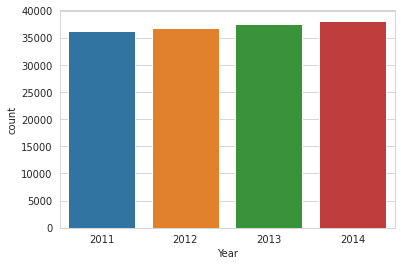

In [0]:
sns.countplot(x='Year', data=sal)
# What can you tell about this?

**Top 5 common job titles**

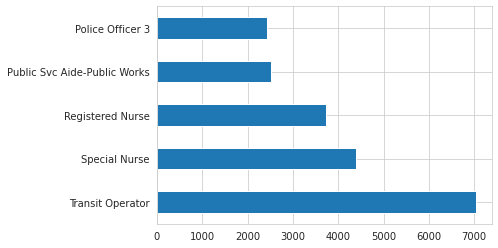

In [0]:
# Top 5 common job titles
top5job = sal['JobTitle'].value_counts().head(5)
top5job.plot(kind='barh')

**Distribution of numerical data**

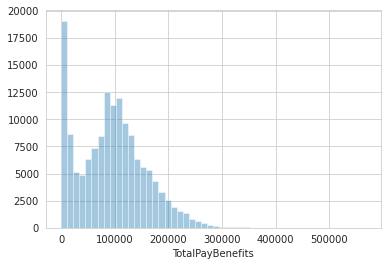

In [0]:
# Distribution of TotalPayBenefits
sns.distplot(sal['TotalPayBenefits'], kde = False)

(array([9.5724e+04, 4.9055e+04, 3.7620e+03, 1.0100e+02, 4.0000e+00]),
 array([     0.   , 113519.086, 227038.172, 340557.258, 454076.344,
        567595.43 ]),
 <a list of 5 Patch objects>)

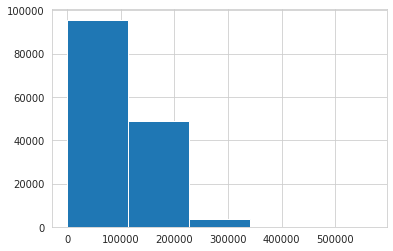

In [0]:
# Histogram is sensitive with the bins
plt.hist(sal['TotalPayBenefits'], bins=5)

**Analize richest people**

In [0]:
# Select people that have TotalPayBenefit greater than $300k
sal[sal['TotalPayBenefits'] > 300000]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.00,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.00,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.00,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.00,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
110617,Jay K Dowke,Police Officer 3,100148.75,15716.42,152037.57,33847.07,267902.74,301749.81,2014
110618,Edward Y Chu,"Lieutenant, Fire Suppression",129817.24,108123.01,16979.29,46748.39,254919.54,301667.93,2014
110619,Matthew J Mcnaughton,Asst Chf of Dept (Fire Dept),205480.80,0.00,29794.80,65881.22,235275.60,301156.82,2014
110620,Madonna P Valencia,"Manager, Dept Public Health",201305.83,0.00,37292.77,62477.06,238598.60,301075.66,2014


In [0]:
def split_income_type(n):
    if n < 1000:
        return 'Retired'
    elif n < 50000:
        return 'Low Income'
    elif n < 150000:
        return 'Midrange'
    elif n < 250000:
        return 'High Income'
    else:
        return 'Millionaire'

split_income_type(300000)

'Millionaire'

In [0]:
# Apply the function above to create a new column name IncomeType from TotalPayBenefits
sal['IncomeType'] = sal['TotalPayBenefits'].apply(split_income_type)

In [0]:
sal.sample(10)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,IncomeType
145322,Heather E Gutierres,Eligibility Worker,6276.49,0.00,0.00,62.78,6276.49,6339.27,2014,Low Income
114650,Raymond E Driscoll,IS Business Analyst-Principal,125662.01,0.00,17420.56,40703.71,143082.57,183786.28,2014,High Income
93425,David V Kelly,Administrative Analyst,67235.40,0.00,0.00,27615.52,67235.40,94850.92,2013,Midrange
125976,Richard D Bridges Jr,Transit Operator,65590.03,8098.87,4084.86,35890.84,77773.76,113664.60,2014,Midrange
41974,Myra Basa,Registered Nurse,106539.45,2433.65,16166.61,39774.46,125139.71,164914.17,2012,High Income
141342,Ingrid J Thompson,Special Nurse,18379.18,0.00,977.05,3931.45,19356.23,23287.68,2014,Low Income
8288,KANCHANA GADDIPATI,IS BUSINESS ANALYST - PRINCIPAL,105931.20,0.00,0.00,0.00,105931.20,105931.20,2011,Midrange
64840,Christian Weinman,Statnry Eng Water Treat Plant,27990.03,0.00,2380.06,8115.87,30370.09,38485.96,2012,Low Income
140351,Lee A Martin,Permit and Citation Clerk,21454.92,1570.19,0.00,8708.51,23025.11,31733.62,2014,Low Income
100749,Margarie Davis,Special Nurse,48646.78,1368.08,3038.70,0.00,53053.56,53053.56,2013,Midrange


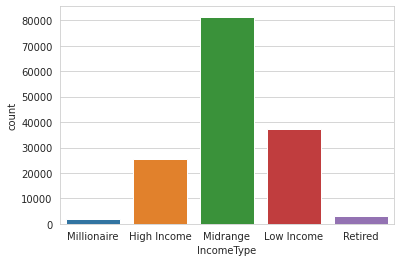

In [0]:
sns.countplot(sal['IncomeType'])
# What can you tell?

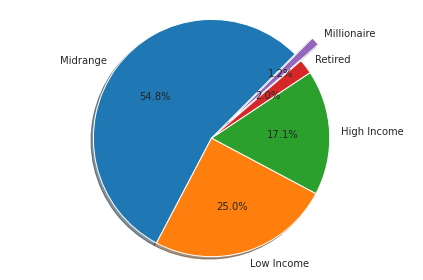

In [0]:
# Pie chart
labels = []
sizes = []
explode = []

labels = sal['IncomeType'].value_counts().index
for index, size in enumerate(sal['IncomeType'].value_counts()):
    sizes.append(size)
    if labels[index]=='Millionaire':
        explode.append(0.2)
    else: # add high income too?
        explode.append(0)
 
f, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

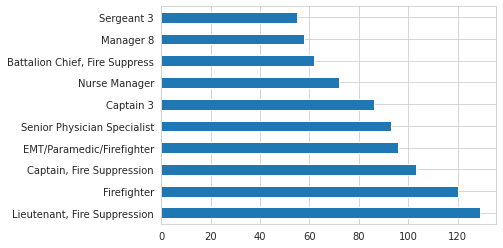

In [0]:
# What is the top 10 Job Title of Millionaire
top10job_count = sal[sal['IncomeType'] == 'Millionaire']['JobTitle'].value_counts().head(10)
top10job_count.plot(kind='barh')

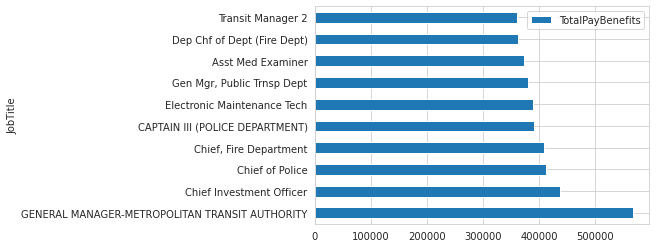

In [0]:
top10job_earning = sal[sal['IncomeType'] == 'Millionaire'].groupby('JobTitle')[['TotalPayBenefits']].mean()
top10job_earning.sort_values(by=['TotalPayBenefits'], ascending = False).head(10).plot(kind='barh')

In [0]:
# Find the name of 10 richest man
richest_man = sal.sort_values(by=['TotalPayBenefits'], ascending = False).head(10)['EmployeeName'].values

In [0]:
# Analyze TotalPayBenefits of 10 richest man each Year
rich_data = sal[sal['EmployeeName'].isin(richest_man)]

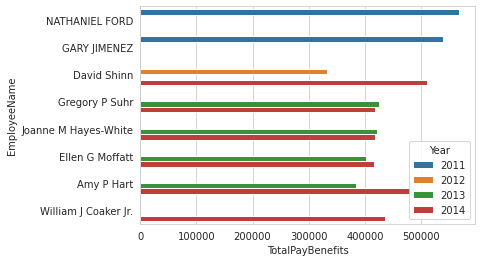

In [0]:
sns.barplot(data=rich_data, x='TotalPayBenefits', y='EmployeeName', hue='Year')